# Import all libraries

In [1]:
import pandas as pd
import numpy as np
import statistics as sts
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

labelencoder = LabelEncoder()


Variable - Description

Item_Identifier - Unique product ID

Item_Weight - Weight of product

Item_Fat_Content - Whether the product is low fat or not

Item_Visibility - The % of total display area of all products in a store allocated to the particular product

Item_Type - The category to which the product belongs

Item_MRP - Maximum Retail Price (list price) of the product

Outlet_Identifier - Unique store ID

Outlet_Establishment_Year - The year in which store was established

Outlet_Size - The size of the store in terms of ground area covered

Outlet_Location_Type 	The type of city in which the store is located

Outlet_Type 	Whether the outlet is just a grocery store or some sort of supermarket

Item_Outlet_Sales 	Sales of the product in the particular store. This is the outcome variable to be predicted.

 

# Download the data and test

In [2]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

sample = pd.read_csv('sample_submission.csv')
train['Item_Outlet_Sales'] = train['Item_Outlet_Sales'].astype(str).astype(float)
df = pd.concat([train,test])

In [3]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
5677,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
5678,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN
5679,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN


In [4]:
numeric_features = train.select_dtypes(include=[np.number])
corr =numeric_features.corr()
print(corr['Item_Outlet_Sales'].sort_values(ascending=False))


Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.014123
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64


In [5]:
sample

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000
...,...,...,...
5676,FDB58,OUT046,1000
5677,FDD47,OUT018,1000
5678,NCO17,OUT045,1000
5679,FDJ26,OUT017,1000


In [6]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

# Categorial data

In [7]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
5677,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
5678,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN
5679,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN


In [8]:
# Item_Fat_Content

df.groupby(['Item_Fat_Content']).size()

Item_Fat_Content
LF          522
Low Fat    8485
Regular    4824
low fat     178
reg         195
dtype: int64

In [9]:
test.loc[test["Item_Fat_Content"] == 'LF', "Item_Fat_Content" ] = "Low Fat"
train.loc[train["Item_Fat_Content"] == 'LF', "Item_Fat_Content" ] = "Low Fat"

test.loc[test["Item_Fat_Content"] == 'low fat', "Item_Fat_Content" ] = "Low Fat"
train.loc[train["Item_Fat_Content"] == 'low fat', "Item_Fat_Content" ] = "Low Fat"


test.loc[test["Item_Fat_Content"] == 'reg', "Item_Fat_Content" ] = "Regular"
train.loc[train["Item_Fat_Content"] == 'reg', "Item_Fat_Content" ] = "Regular"




In [10]:
df.groupby("Item_Fat_Content").size()

Item_Fat_Content
LF          522
Low Fat    8485
Regular    4824
low fat     178
reg         195
dtype: int64

In [11]:
test["Item_Fat_Content"] = labelencoder.fit_transform(test["Item_Fat_Content"])
train["Item_Fat_Content"] = labelencoder.fit_transform(train["Item_Fat_Content"])

In [12]:
#Item_Type

df.groupby(['Item_Type']).size()

Item_Type
Baking Goods             1086
Breads                    416
Breakfast                 186
Canned                   1084
Dairy                    1136
Frozen Foods             1426
Fruits and Vegetables    2013
Hard Drinks               362
Health and Hygiene        858
Household                1548
Meat                      736
Others                    280
Seafood                    89
Snack Foods              1989
Soft Drinks               726
Starchy Foods             269
dtype: int64

In [13]:
train.groupby(['Item_Type'])['Item_Outlet_Sales'].mean()

Item_Type
Baking Goods             1952.971207
Breads                   2204.132226
Breakfast                2111.808651
Canned                   2225.194904
Dairy                    2232.542597
Frozen Foods             2132.867744
Fruits and Vegetables    2289.009592
Hard Drinks              2139.221622
Health and Hygiene       2010.000265
Household                2258.784300
Meat                     2158.977911
Others                   1926.139702
Seafood                  2326.065928
Snack Foods              2277.321739
Soft Drinks              2006.511735
Starchy Foods            2374.332773
Name: Item_Outlet_Sales, dtype: float64

In [14]:
#enconding item type

test["Item_Type"] = labelencoder.fit_transform(test["Item_Type"])
train["Item_Type"] = labelencoder.fit_transform(train["Item_Type"])

In [15]:
test.groupby(['Item_Type']).size()

Item_Type
0     438
1     165
2      76
3     435
4     454
5     570
6     781
7     148
8     338
9     638
10    311
11    111
12     25
13    789
14    281
15    121
dtype: int64

In [16]:
#Outlet_Size

In [17]:
df.groupby(['Outlet_Size']).size()

Outlet_Size
High      1553
Medium    4655
Small     3980
dtype: int64

In [18]:
df['Outlet_Size'].isnull().sum()

4016

In [19]:
#Import mode function:
from scipy.stats import mode#Determing the mode for each
outlet_size_mode = train.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=lambda x:x.mode())
outlet_size_mode = test.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=lambda x:x.mode())

In [20]:
def impute_size_mode(cols):
    Size = cols[0]
    Type = cols[1]
    if pd.isnull(Size):
        return outlet_size_mode.loc['Outlet_Size'][outlet_size_mode.columns == Type][0]
    else:
        return Size
    print ('Orignal #missing: %d'%sum(test['Outlet_Size'].isnull()))
test['Outlet_Size'] = test[['Outlet_Size','Outlet_Type']].apply(impute_size_mode,axis=1)
print ('Final #missing: %d'%sum(test['Outlet_Size'].isnull()))

Final #missing: 0


In [21]:
def impute_size_mode(cols):
    Size = cols[0]
    Type = cols[1]
    if pd.isnull(Size):
        return outlet_size_mode.loc['Outlet_Size'][outlet_size_mode.columns == Type][0]
    else:
        return Size
    print ('Orignal #missing: %d'%sum(train['Outlet_Size'].isnull()))
train['Outlet_Size'] = train[['Outlet_Size','Outlet_Type']].apply(impute_size_mode,axis=1)
print ('Final #missing: %d'%sum(train['Outlet_Size'].isnull()))

Final #missing: 0


In [22]:
df = pd.concat([train,test])
#df.isnull().sum()
df.groupby(['Outlet_Size']).size()

Outlet_Size
High      1553
Medium    4655
Small     7996
dtype: int64

In [23]:
#enconding item type

df["Outlet_Size"] = labelencoder.fit_transform(df["Outlet_Size"])

test["Outlet_Size"] = labelencoder.fit_transform(test["Outlet_Size"])
train["Outlet_Size"] = labelencoder.fit_transform(train["Outlet_Size"])

In [24]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,1,0.019278,14,48.2692,OUT018,2009,1,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,1,0.000000,6,182.0950,OUT010,1998,2,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,0,0.000000,9,53.8614,OUT013,1987,0,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50,1,0.013496,13,141.3154,OUT046,1997,2,Tier 1,Supermarket Type1,NaN
5677,FDD47,7.60,1,0.142991,15,169.1448,OUT018,2009,1,Tier 3,Supermarket Type2,NaN
5678,NCO17,10.00,0,0.073529,8,118.7440,OUT045,2002,2,Tier 2,Supermarket Type1,NaN
5679,FDJ26,15.30,1,0.000000,3,214.6218,OUT017,2007,2,Tier 2,Supermarket Type1,NaN


In [25]:
#Outlet_Location_Type

df.groupby(["Outlet_Location_Type"]).size()

Outlet_Location_Type
Tier 1    3980
Tier 2    4641
Tier 3    5583
dtype: int64

In [26]:
df["Outlet_Location_Type"].isnull().sum()

0

In [27]:
df["Outlet_Location_Type"] = labelencoder.fit_transform(df["Outlet_Location_Type"])

test["Outlet_Location_Type"] = labelencoder.fit_transform(test["Outlet_Location_Type"])
train["Outlet_Location_Type"] = labelencoder.fit_transform(train["Outlet_Location_Type"])

In [28]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380
1,DRC01,5.92,1,0.019278,14,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,Supermarket Type1,2097.2700
3,FDX07,19.20,1,0.000000,6,182.0950,OUT010,1998,2,2,Grocery Store,732.3800
4,NCD19,8.93,0,0.000000,9,53.8614,OUT013,1987,0,2,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50,1,0.013496,13,141.3154,OUT046,1997,2,0,Supermarket Type1,NaN
5677,FDD47,7.60,1,0.142991,15,169.1448,OUT018,2009,1,2,Supermarket Type2,NaN
5678,NCO17,10.00,0,0.073529,8,118.7440,OUT045,2002,2,1,Supermarket Type1,NaN
5679,FDJ26,15.30,1,0.000000,3,214.6218,OUT017,2007,2,1,Supermarket Type1,NaN


In [29]:
#Outlet_Type

df.groupby(['Outlet_Type']).size()

Outlet_Type
Grocery Store        1805
Supermarket Type1    9294
Supermarket Type2    1546
Supermarket Type3    1559
dtype: int64

In [30]:
df['Outlet_Type'].isnull().sum()

0

In [31]:
df["Outlet_Type"] = labelencoder.fit_transform(df["Outlet_Type"])

test["Outlet_Type"] = labelencoder.fit_transform(test["Outlet_Type"])
train["Outlet_Type"] = labelencoder.fit_transform(train["Outlet_Type"])

In [32]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380
1,DRC01,5.92,1,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700
3,FDX07,19.20,1,0.000000,6,182.0950,OUT010,1998,2,2,0,732.3800
4,NCD19,8.93,0,0.000000,9,53.8614,OUT013,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50,1,0.013496,13,141.3154,OUT046,1997,2,0,1,NaN
5677,FDD47,7.60,1,0.142991,15,169.1448,OUT018,2009,1,2,2,NaN
5678,NCO17,10.00,0,0.073529,8,118.7440,OUT045,2002,2,1,1,NaN
5679,FDJ26,15.30,1,0.000000,3,214.6218,OUT017,2007,2,1,1,NaN


# Exploring Numeric information

In [33]:
#Item_Weight

df['Item_Weight'].describe()

count    11765.000000
mean        12.792854
std          4.652502
min          4.555000
25%          8.710000
50%         12.600000
75%         16.750000
max         21.350000
Name: Item_Weight, dtype: float64

In [34]:
df['Item_Weight'].isnull().sum()

2439

Text(0.5, 1.0, 'Item_Weight')

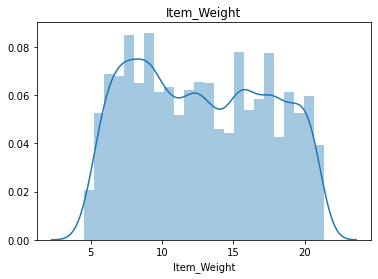

In [35]:
sns.distplot(df['Item_Weight']).set_title('Item_Weight')

In [36]:
df['Item_Weight'].mean()

12.792854228644991

In [37]:
mediana = sts.median(df['Item_Weight'])
mediana

18.35

In [38]:
df['Item_Weight'].fillna(mediana, inplace=True)
test['Item_Weight'].fillna(mediana, inplace=True)
train['Item_Weight'].fillna(mediana, inplace=True)

Text(0.5, 1.0, 'Item_Weight')

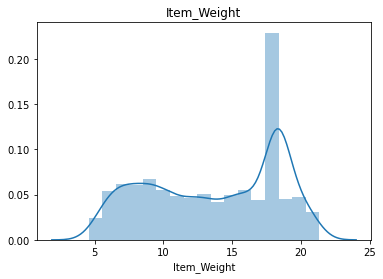

In [39]:
sns.distplot(test['Item_Weight']).set_title('Item_Weight')

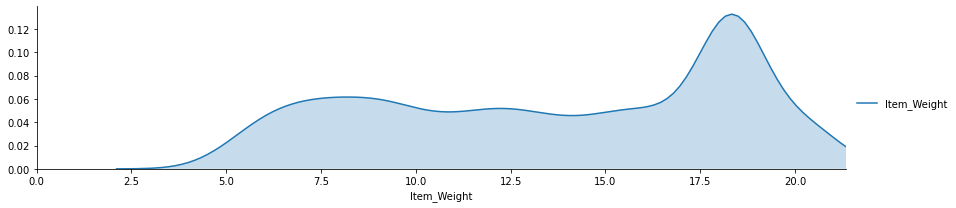

In [40]:
facet = sns.FacetGrid(train, aspect = 4)
facet.map(sns.kdeplot,'Item_Weight',shade= True)
facet.set(xlim=(0, train['Item_Weight'].max()))
facet.add_legend()

plt.show()

In [41]:
df['Item_Weight'].describe()

count    14204.000000
mean        13.747084
std          4.724534
min          4.555000
25%          9.300000
50%         14.500000
75%         18.350000
max         21.350000
Name: Item_Weight, dtype: float64

In [42]:
x = [0,4.55,9.3,13,16.5,18.35,21]
z = ["a","b","c","d","e","f"]

train['Item_Weight1'] = pd.cut(train['Item_Weight'], bins = x, labels = z)
test['Item_Weight1'] = pd.cut(test['Item_Weight'], bins = x, labels = z)

train['Item_Weight1'] = train['Item_Weight1'].astype('string')
test['Item_Weight1'] = test['Item_Weight1'].astype('string')

train["Item_Weight1"] = labelencoder.fit_transform(train["Item_Weight1"].astype(str))
test["Item_Weight1"] = labelencoder.fit_transform(test["Item_Weight1"].astype(str))


train = train.drop(['Item_Weight'], axis = 1)
test = test.drop(['Item_Weight'], axis = 1)

In [43]:
train['Item_Weight1']

0       1
1       1
2       4
3       5
4       1
       ..
8518    1
8519    1
8520    2
8521    1
8522    3
Name: Item_Weight1, Length: 8523, dtype: int32

In [44]:
df=pd.concat([train,test])
df


,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight1
0,FDA15,0,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380,1
1,DRC01,1,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228,1
2,FDN15,0,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700,4
3,FDX07,1,0.000000,6,182.0950,OUT010,1998,2,2,0,732.3800,5
4,NCD19,0,0.000000,9,53.8614,OUT013,1987,0,2,1,994.7052,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,1,0.013496,13,141.3154,OUT046,1997,2,0,1,NaN,2
5677,FDD47,1,0.142991,15,169.1448,OUT018,2009,1,2,2,NaN,1
5678,NCO17,0,0.073529,8,118.7440,OUT045,2002,2,1,1,NaN,2
5679,FDJ26,1,0.000000,3,214.6218,OUT017,2007,2,1,1,NaN,3


In [45]:
#Item_Visibility
df['Item_Visibility'].isnull().sum()
df['Item_Visibility'].describe()

count    14204.000000
mean         0.065953
std          0.051459
min          0.000000
25%          0.027036
50%          0.054021
75%          0.094037
max          0.328391
Name: Item_Visibility, dtype: float64

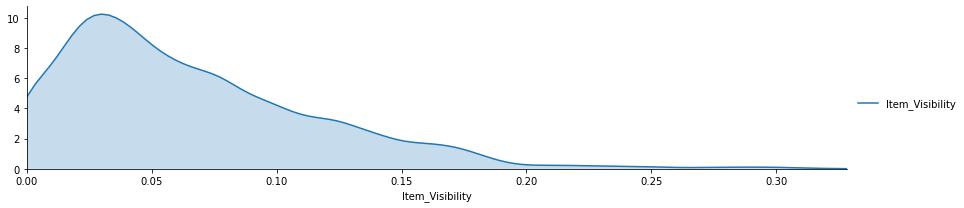

In [46]:
facet = sns.FacetGrid(df, aspect = 4)
facet.map(sns.kdeplot,'Item_Visibility',shade= True)
facet.set(xlim=(0, df['Item_Visibility'].max()))
facet.add_legend()

plt.show()

In [47]:
df[(df['Item_Visibility']==0)]

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight1
3,FDX07,1,0.0,6,182.0950,OUT010,1998,2,2,0,732.3800,5
4,NCD19,0,0.0,9,53.8614,OUT013,1987,0,2,1,994.7052,1
5,FDP36,1,0.0,0,51.4008,OUT018,2009,1,2,2,556.6088,2
10,FDY07,0,0.0,6,45.5402,OUT049,1999,1,0,1,1516.0266,2
32,FDP33,0,0.0,13,256.6672,OUT018,2009,1,2,2,3068.0064,5
...,...,...,...,...,...,...,...,...,...,...,...,...
5643,FDQ19,1,0.0,6,244.3512,OUT019,1985,2,0,0,NaN,4
5648,FDK26,1,0.0,3,187.5240,OUT027,1985,1,2,3,NaN,4
5654,FDQ57,0,0.0,13,144.5760,OUT013,1987,0,2,1,NaN,1
5661,DRG37,0,0.0,14,155.7972,OUT027,1985,1,2,3,NaN,4


In [48]:
bin_labels = ['a', 'b', 'c', 'd']
train['Item_Visibility1'] = pd.qcut(train['Item_Visibility'],
                              q=[0,.25,.5,.75,1],
                              labels=bin_labels)

test['Item_Visibility1'] = pd.qcut(test['Item_Visibility'],
                              q=[0,.25,.5,.75,1],
                              labels=bin_labels)





train["Item_Visibility1"] = labelencoder.fit_transform(train["Item_Visibility1"].astype(str))
test["Item_Visibility1"] = labelencoder.fit_transform(test["Item_Visibility1"].astype(str))


train = train.drop(['Item_Visibility'], axis = 1)
test = test.drop(['Item_Visibility'], axis = 1)

In [49]:
df = pd.concat([test,train])

In [50]:
df

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight1,Item_Visibility1,Item_Outlet_Sales
0,FDW58,0,13,107.8622,OUT049,1999,1,0,1,5,0,NaN
1,FDW14,1,4,87.3198,OUT017,2007,2,1,1,1,1,NaN
2,NCN55,0,11,241.7538,OUT010,1998,2,2,0,3,3,NaN
3,FDQ58,0,13,155.0340,OUT017,2007,2,1,1,1,0,NaN
4,FDY38,1,4,234.2300,OUT027,1985,1,2,3,4,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,0,13,214.5218,OUT013,1987,0,2,1,1,2,2778.3834
8519,FDS36,1,0,108.1570,OUT045,2002,2,1,1,1,1,549.2850
8520,NCJ29,0,8,85.1224,OUT035,2004,2,1,1,2,1,1193.1136
8521,FDN46,1,13,103.1332,OUT018,2009,1,2,2,1,3,1845.5976


In [51]:
# Item_MRP
df['Item_MRP'].isnull().sum()
df['Item_MRP'].describe()

count    14204.000000
mean       141.004977
std         62.086938
min         31.290000
25%         94.012000
50%        142.247000
75%        185.855600
max        266.888400
Name: Item_MRP, dtype: float64

In [52]:
bin_labels = ['a', 'b', 'c', 'd']
train['Item_MRP1'] = pd.qcut(train['Item_MRP'],
                              q=[0,.25,.5,.75,1],
                              labels=bin_labels)

test['Item_MRP1'] = pd.qcut(test['Item_MRP'],
                              q=[0,.25,.5,.75,1],
                              labels=bin_labels)





train["Item_MRP1"] = labelencoder.fit_transform(train["Item_MRP1"].astype(str))
test["Item_MRP1"] = labelencoder.fit_transform(test["Item_MRP1"].astype(str))


train = train.drop(['Item_MRP'], axis = 1)
test = test.drop(['Item_MRP'], axis = 1)
df = pd.concat([test,train])

In [53]:
df

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight1,Item_Visibility1,Item_MRP1,Item_Outlet_Sales
0,FDW58,0,13,OUT049,1999,1,0,1,5,0,1,NaN
1,FDW14,1,4,OUT017,2007,2,1,1,1,1,0,NaN
2,NCN55,0,11,OUT010,1998,2,2,0,3,3,3,NaN
3,FDQ58,0,13,OUT017,2007,2,1,1,1,0,2,NaN
4,FDY38,1,4,OUT027,1985,1,2,3,4,3,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,0,13,OUT013,1987,0,2,1,1,2,3,2778.3834
8519,FDS36,1,0,OUT045,2002,2,1,1,1,1,1,549.2850
8520,NCJ29,0,8,OUT035,2004,2,1,1,2,1,0,1193.1136
8521,FDN46,1,13,OUT018,2009,1,2,2,1,3,1,1845.5976


In [54]:
#Outlet_Establishment_Year

df.groupby(by='Outlet_Establishment_Year').size()


Outlet_Establishment_Year
1985    2439
1987    1553
1997    1550
1998     925
1999    1550
2002    1548
2004    1550
2007    1543
2009    1546
dtype: int64

In [55]:
check_year_mean= train[['Outlet_Establishment_Year', 'Item_Outlet_Sales']].groupby('Outlet_Establishment_Year').mean()
check_year_sum= train[['Outlet_Establishment_Year', 'Item_Outlet_Sales']].groupby('Outlet_Establishment_Year').sum()

In [56]:
check_year_mean

,Item_Outlet_Sales
Outlet_Establishment_Year,
1985,2483.677474
1987,2298.995256
1997,2277.844267
1998,339.351662
1999,2348.354635
2002,2192.384798
2004,2438.841866
2007,2340.675263
2009,1995.498739


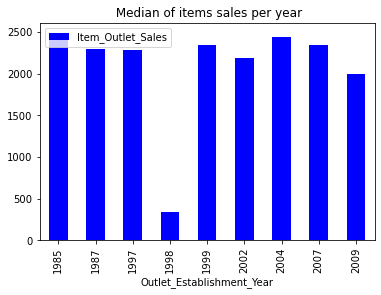

In [57]:
check_year_mean.plot.bar(color = 'blue', title = ' Median of items sales per year')

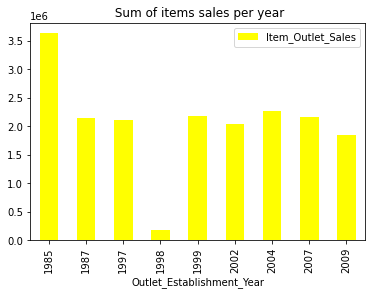

In [58]:
check_year_sum.plot.bar(color = 'yellow', title = ' Sum of items sales per year')

In [59]:
train["Outlet_Establishment_Year"] = labelencoder.fit_transform(train["Outlet_Establishment_Year"])
test["Outlet_Establishment_Year"] = labelencoder.fit_transform(test["Outlet_Establishment_Year"])
df["Outlet_Establishment_Year"] = labelencoder.fit_transform(df["Outlet_Establishment_Year"])


In [60]:
df.groupby(by='Outlet_Establishment_Year').size()

Outlet_Establishment_Year
0    2439
1    1553
2    1550
3     925
4    1550
5    1548
6    1550
7    1543
8    1546
dtype: int64

In [61]:
df

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight1,Item_Visibility1,Item_MRP1,Item_Outlet_Sales
0,FDW58,0,13,OUT049,4,1,0,1,5,0,1,NaN
1,FDW14,1,4,OUT017,7,2,1,1,1,1,0,NaN
2,NCN55,0,11,OUT010,3,2,2,0,3,3,3,NaN
3,FDQ58,0,13,OUT017,7,2,1,1,1,0,2,NaN
4,FDY38,1,4,OUT027,0,1,2,3,4,3,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,0,13,OUT013,1,0,2,1,1,2,3,2778.3834
8519,FDS36,1,0,OUT045,5,2,1,1,1,1,1,549.2850
8520,NCJ29,0,8,OUT035,6,2,1,1,2,1,0,1193.1136
8521,FDN46,1,13,OUT018,8,1,2,2,1,3,1,1845.5976


# Split target from data

In [62]:
train['Item_Outlet_Sales'] = train['Item_Outlet_Sales'].astype(str).astype(float)

In [63]:
#Create source column to later separate the data easily
train_data = train.drop(columns=['Item_Outlet_Sales','Outlet_Identifier','Item_Identifier'],axis=1)
train_target = train['Item_Outlet_Sales']

test_data = test.drop(columns=['Outlet_Identifier','Item_Identifier'],axis=1)

In [64]:
train_data


,Item_Fat_Content,Item_Type,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight1,Item_Visibility1,Item_MRP1
0,0,4,4,1,0,1,1,0,3
1,1,14,8,1,2,2,1,0,0
2,0,10,4,1,0,1,4,0,1
3,1,6,3,2,2,0,5,0,2
4,0,9,1,0,2,1,1,0,0
...,...,...,...,...,...,...,...,...,...
8518,0,13,1,0,2,1,1,2,3
8519,1,0,5,2,1,1,1,1,1
8520,0,8,6,2,1,1,2,1,0
8521,1,13,8,1,2,2,1,3,1


In [65]:
train_target

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [66]:
sample

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000
...,...,...,...
5676,FDB58,OUT046,1000
5677,FDD47,OUT018,1000
5678,NCO17,OUT045,1000
5679,FDJ26,OUT017,1000


# Machine learning

In [67]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [68]:


from sklearn import preprocessing

x = train_data.values #returns a numpy array
test_s = test_data.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled_train = min_max_scaler.fit_transform(x)
x_scaled_test = min_max_scaler.fit_transform(test_s)
#train = pd.DataFrame(x_scaled_train)
#test = pd.DataFrame(x_scaled_test)



In [69]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_data,train_target)

LinearRegression()

In [70]:
sample

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000
...,...,...,...
5676,FDB58,OUT046,1000
5677,FDD47,OUT018,1000
5678,NCO17,OUT045,1000
5679,FDJ26,OUT017,1000


In [71]:
prediction = model.predict(test_data)

In [72]:
test

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight1,Item_Visibility1,Item_MRP1
0,FDW58,0,13,OUT049,4,1,0,1,5,0,1
1,FDW14,1,4,OUT017,7,2,1,1,1,1,0
2,NCN55,0,11,OUT010,3,2,2,0,3,3,3
3,FDQ58,0,13,OUT017,7,2,1,1,1,0,2
4,FDY38,1,4,OUT027,0,1,2,3,4,3,3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,1,13,OUT046,2,2,0,1,2,0,1
5677,FDD47,1,15,OUT018,8,1,2,2,1,3,2
5678,NCO17,0,8,OUT045,5,2,1,1,2,2,1
5679,FDJ26,1,3,OUT017,7,2,1,1,3,0,3


In [74]:

submission = pd.DataFrame({"Item_Identifier":test["Item_Identifier"],"Outlet_Identifier":test["Outlet_Identifier"],"Item_Outlet_Sales":abs(prediction)})
submission.to_csv('submission1.csv', index=False)
submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1938.116909
1,FDW14,OUT017,849.476406
2,NCN55,OUT010,1798.149142
3,FDQ58,OUT017,2485.771123
4,FDY38,OUT027,4863.553321


In [77]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
train_data, train_target = make_regression(n_features=9, n_informative=2,
                       random_state=0, shuffle=False)

regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(train_data, train_target)

prediction = regr.predict(test_data)

In [80]:

submission2 = pd.DataFrame({"Item_Identifier":test["Item_Identifier"],"Outlet_Identifier":test["Outlet_Identifier"],"Item_Outlet_Sales":abs(prediction)})
submission2.to_csv('submission2.csv', index=False)
submission2.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,8.422843
1,FDW14,OUT017,111.114723
2,NCN55,OUT010,8.422843
3,FDQ58,OUT017,8.422843
4,FDY38,OUT027,110.037661


In [85]:
from sklearn import utils
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(train_target)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(train_target))
print(utils.multiclass.type_of_target(train_target.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))

[94 69 44 77 95 17 62 10 61 85 67 91 97 63 76 83 98 23 81 78 16 72 99 35
 60 57 31 36 47 21 13 93 89 64  4 55 15  0 14 40 73 22 66 43 90 79 96 53
 82 18 39 41  6 48 92 34 26  2  3 87 29 37  7 71 11 30 70 27 86 33 25 88
 68 12 74 45  1  5 50 58 28 59 24 32 56 19  8 20 54 75 49 52 80 51 65  9
 38 42 46 84]
continuous
multiclass
multiclass


In [87]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(train_data,training_scores_encoded)
prediction = logisticRegr.predict(test_data)

In [89]:
submission3 = pd.DataFrame({"Item_Identifier":test["Item_Identifier"],"Outlet_Identifier":test["Outlet_Identifier"],"Item_Outlet_Sales":abs(prediction)})
submission3.to_csv('submission3.csv', index=False)
submission3.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,76
1,FDW14,OUT017,97
2,NCN55,OUT010,67
3,FDQ58,OUT017,76
4,FDY38,OUT027,67


In [90]:
from sklearn.ensemble import RandomForestRegressor 

In [95]:
regressor = RandomForestRegressor(n_estimators=1000, random_state=0)
regressor.fit(train_data,train_target)

RandomForestRegressor(n_estimators=1000, random_state=0)

In [96]:
prediction = regressor.predict(test_data)

In [97]:
submission4 = pd.DataFrame({"Item_Identifier":test["Item_Identifier"],"Outlet_Identifier":test["Outlet_Identifier"],"Item_Outlet_Sales":abs(prediction)})
submission4.to_csv('submission3.csv', index=False)
submission4.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,58.009015
1,FDW14,OUT017,144.127538
2,NCN55,OUT010,58.128691
3,FDQ58,OUT017,61.336617
4,FDY38,OUT027,148.305221


In [99]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(train_data,train_target)

SVR()

In [100]:
prediction = regressor.predict(test_data)

In [101]:
submission5 = pd.DataFrame({"Item_Identifier":test["Item_Identifier"],"Outlet_Identifier":test["Outlet_Identifier"],"Item_Outlet_Sales":abs(prediction)})
submission5.to_csv('submission5.csv', index=False)
submission5.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,5.062474
1,FDW14,OUT017,5.033097
2,NCN55,OUT010,5.062472
3,FDQ58,OUT017,5.062474
4,FDY38,OUT027,5.018714
